In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Telco_customer_churn.csv to Telco_customer_churn.csv


In [ ]:
data=pd.read_csv('Telco_customer_churn.csv')  # Replace with your file name


In [ ]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
print ("Number of rows in the dataset  : " ,data.shape[0])
print ("Number of Columns in the dataset : " ,data.shape[1])
print ("Number of Features : \n" ,data.columns.tolist())
print ("Missing values :  ", data.isnull().sum().values.sum())
print ("Unique values :  \n",data.nunique())

Number of rows in the dataset  :  7043
Number of Columns in the dataset :  33
Number of Features : 
 ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']
Missing values :   5174
Unique values :  
 CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
P

In [ ]:
data['TotalCharges']=data["TotalCharges"].replace(r'\s+',np.nan,regex=True)
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

KeyError: 'TotalCharges'

In [ ]:
fill=data.MonthlyCharges*data.tenure

AttributeError: 'DataFrame' object has no attribute 'MonthlyCharges'

In [ ]:
data.TotalCharges.fillna(fill,inplace=True)


AttributeError: 'DataFrame' object has no attribute 'TotalCharges'

In [ ]:
#data.isnull().sum()


In [ ]:
df=data

NameError: name 'data' is not defined

In [ ]:
def changeColumnsToString(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df[col]=df[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColumnsToString(df)

df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

KeyError: 'PhoneService'

In [ ]:
#df.head()

In [ ]:
print("Payment methods: ",df.PaymentMethod.unique())
print("Contract types: ",df.Contract.unique())
print("Gender: ",df.gender.unique())
print("Senior Citizen: ",df.SeniorCitizen.unique())
print("Internet Service Types: ",df.InternetService.unique())

In [ ]:
df['gender']=df['gender'].astype('category')
df['PaymentMethod']=df['PaymentMethod'].astype('category')
df['Contract']=df['Contract'].astype('category')
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')
df['InternetService']=df['InternetService'].astype('category')
#df.dtypes

In [ ]:
dfPaymentDummies = pd.get_dummies(df['PaymentMethod'], prefix = 'payment')
dfContractDummies = pd.get_dummies(df['Contract'], prefix = 'contract')
dfGenderDummies = pd.get_dummies(df['gender'], prefix = 'gender')
dfSeniorCitizenDummies = pd.get_dummies(df['SeniorCitizen'], prefix = 'SC')
dfInternetServiceDummies = pd.get_dummies(df['InternetService'], prefix = 'IS')

'''
print(dfPaymentDummies.head(3))
print(dfContractDummies.head(3))
print(dfGenderDummies.head(3))
print(dfSeniorCitizenDummies.head(3))
print(dfInternetServiceDummies.head(3))
'''


In [ ]:
df.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

df = pd.concat([df, dfPaymentDummies], axis=1)
df = pd.concat([df, dfContractDummies], axis=1)
df = pd.concat([df, dfGenderDummies], axis=1)
df = pd.concat([df, dfSeniorCitizenDummies], axis=1)
df = pd.concat([df, dfInternetServiceDummies], axis=1)
df.head(2)

In [ ]:
df.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No']

In [ ]:
numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No'])

for columnName in numericColumns:
    df[columnName]=pd.to_numeric(df[columnName],errors='coerce')
#df.dtypes

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.Churn.value_counts()

In [ ]:
#spliting the testing and training data


df_test=df[5001:]
df_train=df[:5001]


X_test = df_test.drop('Churn', axis=1)
Y_test = df_test['Churn']

# ***UP-SAMPLING***

In [ ]:
# Separate majority and minority classes
df_majority = df_train[df_train.Churn==0]
df_minority = df_train[df_train.Churn==1]

NameError: name 'df_train' is not defined

In [ ]:
df_majority.shape,df_minority.shape

NameError: name 'df_majority' is not defined

In [ ]:
from sklearn.utils import resample

In [ ]:
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=3688,    # to match majority class
                                 random_state=123)

NameError: name 'resample' is not defined

In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_upsampled

In [ ]:
df_up=df_upsampled.sample(frac=1)

In [ ]:
df_up['Churn'].value_counts()

In [ ]:
# Dividing the dataset into two part one having onlty the target value and other having all other columns
X_up = df_up.drop('Churn', axis=1)
Y_up = df_up['Churn']

X_up.shape, X_test.shape,Y_up.shape, Y_test.shape

In [ ]:
X_up=X_up.drop('customerID', axis=1)
X_test=X_test.drop('customerID', axis=1)

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_up,Y_up)
y_pred = logistic_model.predict(X_test)

acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, y_pred, target_names=target_names))
cf_matrix=confusion_matrix(y_pred,Y_test)
cf_matrix

# ***DOWN-SAMPLING***

In [ ]:
df_majority_downsampled = resample(df_majority,
                                 replace=True,    # sample without replacement
                                 n_samples=1313,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
df_down=df_downsampled.sample(frac=1)


In [ ]:
df_down['Churn'].value_counts()

In [ ]:
# Dividing the dataset into two part one having onlty the target value and other having all other columns
X_down = df_down.drop('Churn', axis=1)
Y_down= df_down['Churn']

X_down.shape, X_test.shape,Y_down.shape, Y_test.shape

In [ ]:
X_down=X_down.drop('customerID', axis=1)
#X_test=X_test.drop('customerID', axis=1)

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_down, Y_down)
y_pred = logistic_model.predict(X_test)

acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, y_pred, target_names=target_names))
cf_matrix=confusion_matrix(y_pred, Y_test)
cf_matrix

# ***SMOTE-ENN***

In [ ]:
X_train_se=df_train.drop(['customerID','Churn'],axis=1)
Y_train_se=df_train['Churn']
X_train_se.shape,Y_train_se.shape

In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 2)
X_train_sen, y_train_sen = sm.fit_resample(X_train_se, Y_train_se.ravel())

In [ ]:
X_train_sen.shape,y_train_sen.shape


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_train_sen, y_train_sen)
y_pred = logistic_model.predict(X_test)

acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, y_pred, target_names=target_names))
cf_matrix=confusion_matrix(y_pred, Y_test)
cf_matrix

NameError: name 'X_train_sen' is not defined

# ***VISUALIZATION***

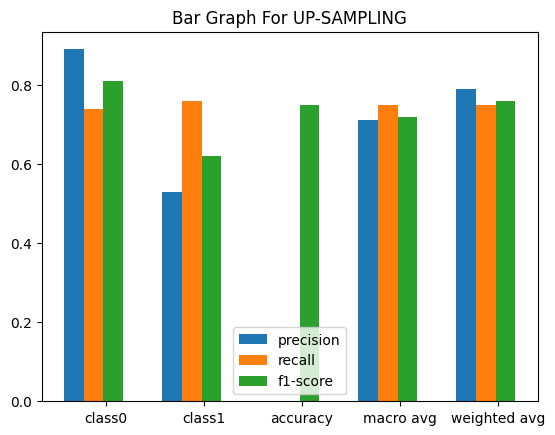

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = ["class0","class1","accuracy","macro avg","weighted avg"]
y=[0.89,0.53,0,0.71,0.79]
z=[0.74,0.76,0,0.75,0.75]
m=[0.81,0.62,0.75,0.72,0.76]
x_axis=np.arange(len(x))
width=0.25
plt.bar(x_axis - 0.2,y,0.2,label="precision")
plt.bar(x_axis + 0.,z,0.2,label="recall")
plt.bar(x_axis + 0.2,m,0.2,label="f1-score")
plt.xticks(x_axis+width/2,x)
plt.title("Bar Graph For UP-SAMPLING")
plt.legend()
plt.show()

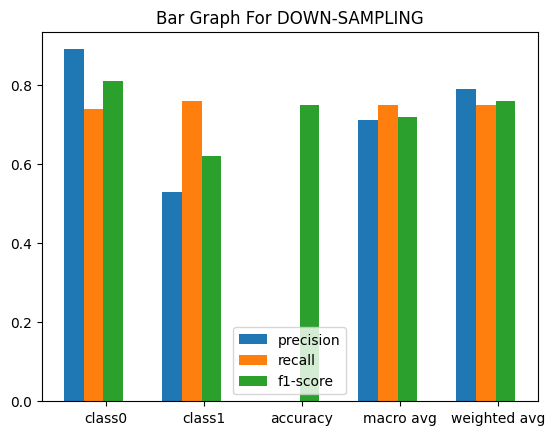

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = ["class0","class1","accuracy","macro avg","weighted avg"]
y=[0.89,0.53,0,0.71,0.79]
z=[0.74,0.76,0,0.75,0.75]
m=[0.81,0.62,0.75,0.72,0.76]
x_axis=np.arange(len(x))
width=0.25
plt.bar(x_axis - 0.2,y,0.2,label="precision")
plt.bar(x_axis + 0.,z,0.2,label="recall")
plt.bar(x_axis + 0.2,m,0.2,label="f1-score")
plt.xticks(x_axis+width/2,x)
plt.title("Bar Graph For DOWN-SAMPLING")
plt.legend()
plt.show()

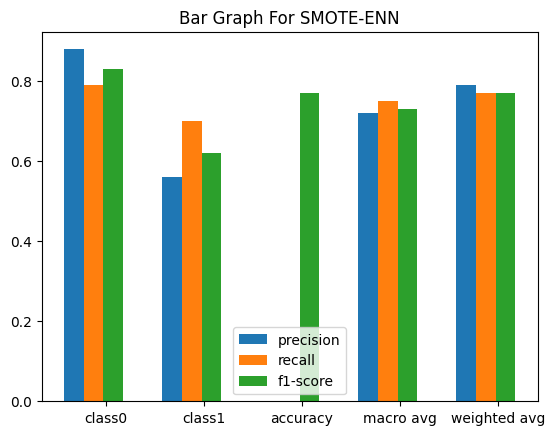

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = ["class0","class1","accuracy","macro avg","weighted avg"]
y=[0.88,0.56,0,0.72,0.79]
z=[0.79,0.70,0,0.75,0.77]
m=[0.83,0.62,0.77,0.73,0.77]
x_axis=np.arange(len(x))
width=0.25
plt.bar(x_axis - 0.2,y,0.2,label="precision")
plt.bar(x_axis + 0.,z,0.2,label="recall")
plt.bar(x_axis + 0.2,m,0.2,label="f1-score")
plt.xticks(x_axis+width/2,x)
plt.title("Bar Graph For SMOTE-ENN")
plt.legend()
plt.show()